<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example%20CNN%20image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provides a comprehensive explanation of Convolutional Neural Networks (CNNs)
with visualizations and practical examples using TensorFlow/Keras in Google Colab.

1. Conv2D: Extracts features using filters
2. MaxPooling2D: Reduces spatial dimensions
3. Dense: Final classification layer
4. Softmax: Outputs probability distribution

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import cv2

# Load data

CIFAR-10: This dataset consists of 60,000 32x32 color images, divided into 10 distinct classes (e.g., airplane, car, bird, cat, deer, dog, frog, horse, ship, truck).

https://www.cs.toronto.edu/~kriz/cifar.html

In [14]:

# Set random seeds for reproducibility
tf.random.set_seed(37)
np.random.seed(37)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

# Cell 2: Load and explore the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Libraries imported successfully!
TensorFlow version: 2.19.0
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


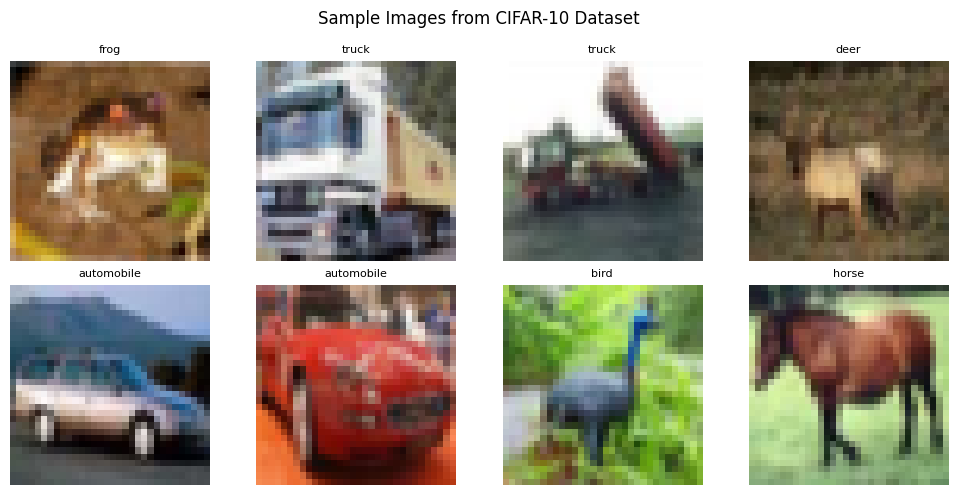

In [15]:
# Cell 3: Visualize sample images (smaller sample for speed)
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'{class_names[y_train[i][0]]}', fontsize=8)
    plt.axis('off')
plt.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=12)
plt.tight_layout()
plt.show()

# CNN model

Data preprocessing completed!


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,834 (350.91 KB)

 Trainable params: 89,834 (350.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.3163 - loss: 1.8428 - val_accuracy: 0.4922 - val_loss: 1.3865
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5259 - loss: 1.3219 - val_accuracy: 0.5643 - val_loss: 1.2093
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.5904 - loss: 1.1594 - val_accuracy: 0.6046 - val_loss: 1.1051
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6281 - loss: 1.0576 - val_accuracy: 0.6412 - val_loss: 1.0207
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6576 - loss: 0.9835 - val_accuracy: 0.6591 - val_loss: 0.9722


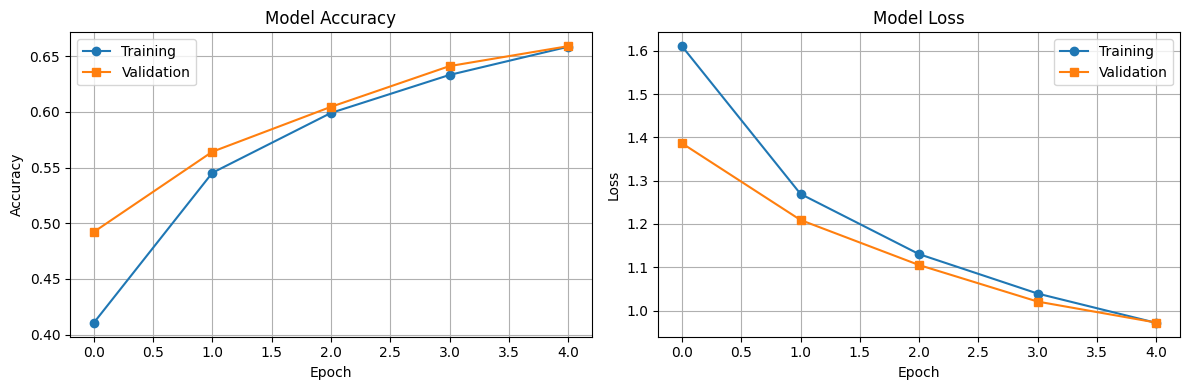

In [16]:

# Cell 4: Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print("Data preprocessing completed!")

# Cell 5: Build a smaller, faster CNN model
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# Cell 6: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Cell 7: Train the model (fewer epochs for speed)
history = model.fit(
    x_train, y_train_categorical,
    batch_size=64,  # Larger batch size for speed
    epochs=5,       # Reduced epochs
    validation_data=(x_test, y_test_categorical),
    verbose=1
)

# Cell 8: Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'], label='Training', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation', marker='s')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['loss'], label='Training', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation', marker='s')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Prediction

Test Accuracy: 0.6591
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


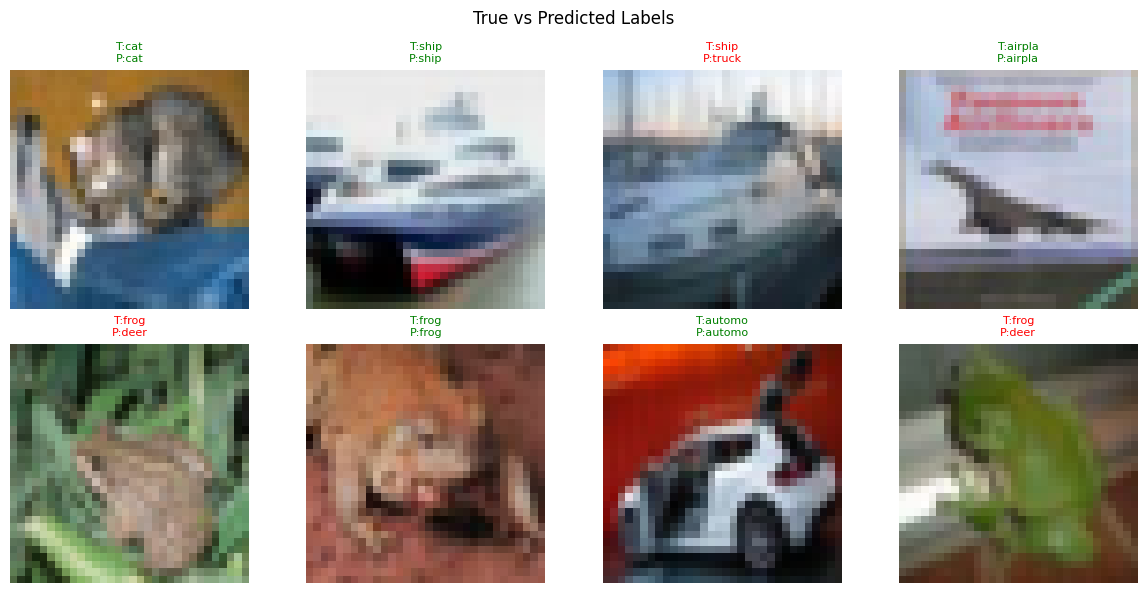


Model Performance:
Accuracy: 0.659
Parameters: 89,834

Model saved!


In [17]:


# Cell 9: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Cell 10: Make predictions and visualize results
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

def plot_predictions(images, true_labels, predicted_labels, class_names, num_images=8):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        true_name = class_names[true_labels[i]]
        pred_name = class_names[predicted_labels[i]]

        color = 'green' if true_labels[i] == predicted_labels[i] else 'red'
        plt.title(f'T:{true_name[:6]}\nP:{pred_name[:6]}', color=color, fontsize=8)
        plt.axis('off')
    plt.suptitle('True vs Predicted Labels', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_predictions(x_test, true_classes, predicted_classes, class_names)


print(f"\nModel Performance:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Parameters: {model.count_params():,}")

# Save model
model.save('fast_cnn_model.h5')
print("\nModel saved!")